# Graphs depicting rate of blacklisting for liars given fixed lies

This file allows us to measure how many liars are blacklisted, depending on the choice of liars for a fixed set of lies.

There are multiple configurable variables (see below)

The generated data can be created by the graph_var_liars_test.go file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
lowerBoundLies = 1000  #lower bound on difference between true latency and lie told about it
upperBoundLies = 5000 #upper bound on difference between true latency and lie told about it
nbNodes = 100
nbLiars = 33
nbLiarCombinations = 100 #nb different combinations of liars chosen throughout test
randomLiars = False      #whether the liars are chosen randomly or within cluster
withSuspects = True      #activate enhanced blacklisting

random = "random_liars"
if not randomLiars:
    random = "clustered_liars"

filename = "test_" + \
    str(nbNodes) + "_nodes_" +\
    str(nbLiars) + "_liars" +\
    "_var_liars_distance_" + str(upperBoundLies) +\
    "_" + random +\
    "_" + str(nbLiarCombinations) + "_combinations"

if withSuspects:
    filename += "_with_suspects"

In [3]:
data= pd.read_csv("data/" + filename + ".csv")

In [4]:
data

,node,is_liar,is_blacklisted,lie,cluster
0,N0,False,False,0,0
1,N1,False,False,0,0
2,N2,False,False,0,0
3,N3,True,True,2245,0
4,N3,True,True,1245,0
5,N3,True,True,4894,0
6,N3,True,True,3782,0
7,N3,True,True,4047,0
8,N3,True,True,1386,0
9,N3,True,True,4726,0


In [5]:
data["grouped"] = list(zip(data.is_liar, data.is_blacklisted))
grouped_data = data[["node", "grouped"]]

In [6]:
grouped_by_node = grouped_data.groupby("node").agg(lambda x: set(x.values.tolist()))

In [7]:
grouped_by_node["nb_situations"] = grouped_by_node['grouped'].map(lambda x: len(x))

In [8]:
grouped_by_node.sort_values(by="nb_situations", ascending=False)

,grouped,nb_situations
node,,
N54,"{(True, False), (False, False), (True, True)}",3
N68,"{(True, False), (False, False), (True, True)}",3
N34,"{(True, False), (False, False), (True, True)}",3
N62,"{(True, False), (False, False), (True, True)}",3
N36,"{(True, False), (False, False), (True, True)}",3
N38,"{(True, False), (False, False), (True, True)}",3
N75,"{(True, False), (False, False), (True, True)}",3
N41,"{(True, False), (False, False), (True, True)}",3
N42,"{(True, False), (False, False), (True, True)}",3


In [9]:
data[["node", "is_liar", "is_blacklisted"]].groupby(["is_liar", "is_blacklisted"]).count()

node
is_liar is_blacklisted        
False   False             6700
True    False             5836
        True            268064

In [10]:
lie_effects = data[["lie", "is_blacklisted"]][data["lie"] > 0]

In [11]:
lie_effects.groupby("lie").count().reset_index()

,lie,is_blacklisted
0,1001,100
1,1005,200
2,1006,100
3,1007,300
4,1009,100
5,1010,100
6,1011,100
7,1015,100
8,1017,100
9,1020,200


In [12]:
lie_effects.groupby("lie").agg(lambda x: set(x.values.tolist())).reset_index().sort_values(by="lie")

,lie,is_blacklisted
0,1001,{True}
1,1005,"{False, True}"
2,1006,{True}
3,1007,"{False, True}"
4,1009,{True}
5,1010,{True}
6,1011,{True}
7,1015,{True}
8,1017,{True}
9,1020,"{False, True}"


In [13]:
bl_by_lie = lie_effects.groupby(['lie', 'is_blacklisted']).size().unstack(fill_value=0).reset_index().sort_values(by="lie")

In [14]:
bl_by_lie

is_blacklisted,lie,False,True
0,1001,0,100
1,1005,1,199
2,1006,0,100
3,1007,8,292
4,1009,0,100
5,1010,0,100
6,1011,0,100
7,1015,0,100
8,1017,0,100
9,1020,2,198


In [15]:
bl_by_lie['lie_buckets'] = pd.qcut(bl_by_lie['lie'], 10)

In [16]:
bl_by_lie[["lie_buckets", True, False]].groupby("lie_buckets").sum().reset_index()

is_blacklisted,lie_buckets,True,False
0,"(1000.999, 1429.3]",28171,329
1,"(1429.3, 1811.2]",26696,704
2,"(1811.2, 2200.9]",27125,275
3,"(2200.9, 2622.8]",26377,423
4,"(2622.8, 3032.5]",25916,784
5,"(3032.5, 3418.6]",26048,752
6,"(3418.6, 3798.4]",26033,867
7,"(3798.4, 4223.6]",27839,661
8,"(4223.6, 4596.7]",26120,680
9,"(4596.7, 4999.0]",27739,361


Text(0.5, 0, 'Lie range')

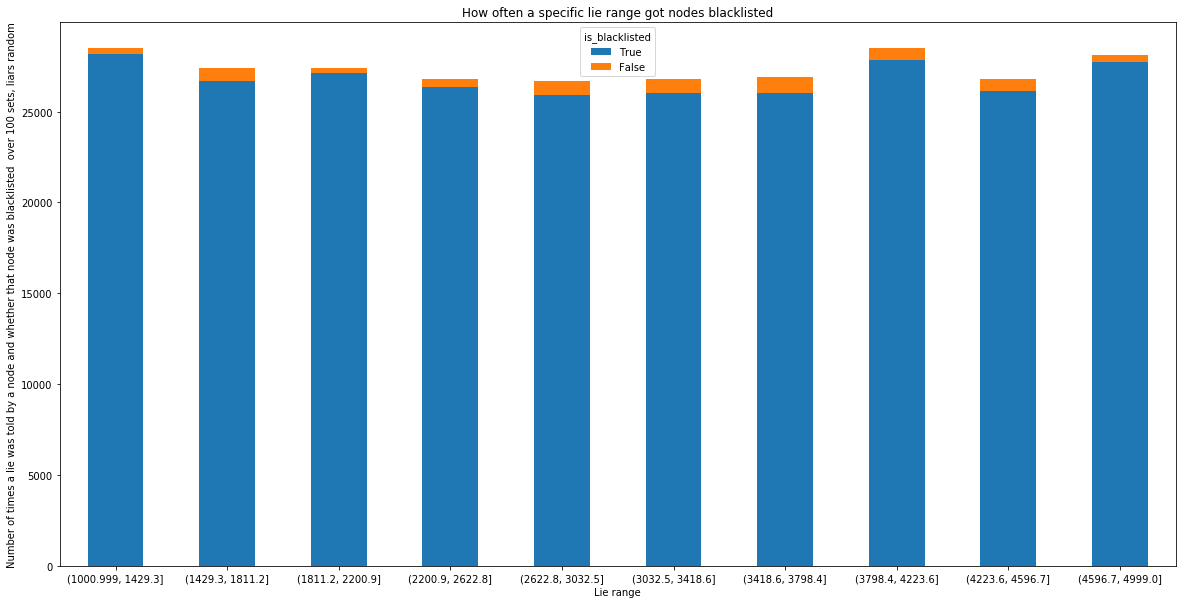

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
bl_by_lie[["lie_buckets", True, False]]\
    .groupby("lie_buckets").sum().reset_index()\
    .plot.bar(stacked=True, ax=ax, rot=0, 
              x="lie_buckets", title="How often a specific lie range got nodes blacklisted")

ax.set_ylabel("Number of times a lie was told by a node and whether that node was blacklisted  over 100 sets, liars random")
ax.set_xlabel("Lie range")

In [18]:
fig.savefig('graphs/range/'+ filename +".png")

In [19]:
bl_by_lie["Percentage"] = (bl_by_lie[True]/(bl_by_lie[True] + bl_by_lie[False])).replace([np.inf, -np.inf], 0.0)

In [20]:
bl_by_lie

is_blacklisted,lie,False,True,lie_buckets,Percentage
0,1001,0,100,"(1000.999, 1429.3]",1.000000
1,1005,1,199,"(1000.999, 1429.3]",0.995000
2,1006,0,100,"(1000.999, 1429.3]",1.000000
3,1007,8,292,"(1000.999, 1429.3]",0.973333
4,1009,0,100,"(1000.999, 1429.3]",1.000000
5,1010,0,100,"(1000.999, 1429.3]",1.000000
6,1011,0,100,"(1000.999, 1429.3]",1.000000
7,1015,0,100,"(1000.999, 1429.3]",1.000000
8,1017,0,100,"(1000.999, 1429.3]",1.000000
9,1020,2,198,"(1000.999, 1429.3]",0.990000


Text(0.5, 0, 'Lie ranges')

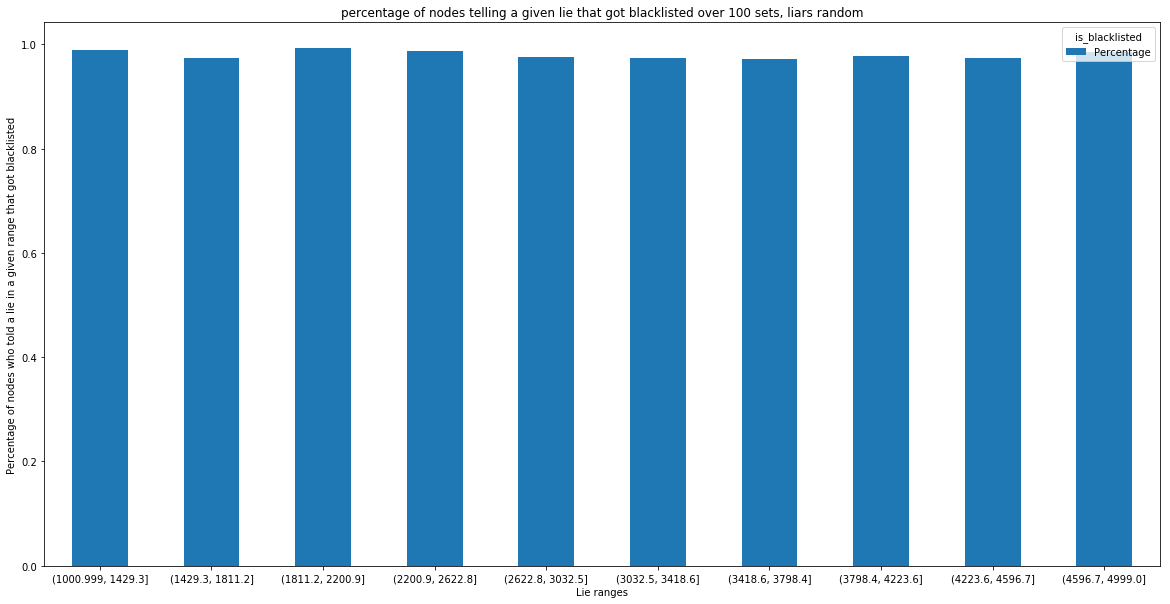

In [21]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
bl_by_lie[["Percentage", "lie_buckets"]]\
    .groupby("lie_buckets").mean().reset_index()\
    .plot(kind="bar",x="lie_buckets", ax=ax1, yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],  rot=0,
          title="percentage of nodes telling a given lie that got blacklisted over 100 sets, liars random")

ax1.set_ylabel("Percentage of nodes who told a lie in a given range that got blacklisted")
ax1.set_xlabel("Lie ranges")

In [22]:
fig1.savefig('graphs/percentage/'+filename+'_percentage.png')